**ML Lab 1**
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_LAB_PROG/blob/main/01_lifesat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Hints

## General
_Imports_
```python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import urllib.request
```

_Data location_
```python
url_lifesat = 'https://github.com/marcinsawinski/UEP_KIE_ML_LAB_PROG/raw/main/datasets/lifesat/lifesat.csv'
```

## Pandas
_Read remote or local csv into a pandas dataframe_
```python
df = pd.read_csv('file or url address')
```
### Subet dataframe data

_Pick specific columns_
```python
df[['column1','column2']]
```

_Pick rows that fill specifi criteria e.g. rows where column1 is equal 100_
```python
df[df.column1 == 100]
```

_Convert pandas to numpy array_
```python
df.values 
```
or
```python
df.to_numpy()
```
_Visualize dataframe as scatter plot_
```python
df.plot(kind='scatter', grid=True,
             x="column1", y="column2")
plt.show()
```
_

_
```python
df_c = pd.merge(left=df_a, right=df_b, left_index=True, right_index=True)
```
_Merge dataframes df\_a and df\_b into df\_c using key column column1_
```python
df_c = pd.merge(left=df_a, right=df_b, on='column1')
```

## scikit-learn
_Create Linear Regression Model_
```python
model = LinearRegression()
```
_Create Regression Model based on k-nearest neighbors with k=5_
```python
model = KNeighborsRegressor(n_neighbors=5)
```
_Fit model with independant variables a and dependant variable b_
```python
model.fit(a, b)
```
_Predict using  model for one new values (one element matrix with value 100_
```python
x_n = [[100]]
model.predict(x_n)
```

## Request
_Fetch file from url and_
```python
urllib.request.urlretrieve(url, filename)
```

# Task 1-1.1
_Get data and visualize_
- Download lifesat data into pandas dataframe called lifesat
- Visualize with scatter plot "GDP per capita (USD)" on x axis , "Life satisfaction" of y axis

_Type your code below_

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import urllib.request

In [ ]:
url_lifesat = 'https://github.com/marcinsawinski/UEP_KIE_ML_LAB_PROG/raw/main/datasets/lifesat/lifesat.csv'
lifesat = pd.read_csv(url_lifesat)
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [ ]:
lifesat

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


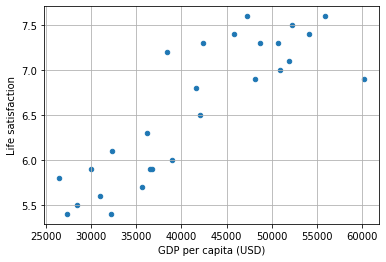

In [ ]:
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.show()

# Task 1-1.2
_Train the model and predict_
- Assign new variable X with data from "GDP per capita (USD)" column converted to numpy array
- Assign new variable y with data from "Life satisfaction" column converted to numpy array
- Train linear regression Model for X and y and predict "Life satisfaction" when "GDP per capita (USD)" is equal 37655.2
- Train k-nearest neighbors Model with k=3 for X and y and predict "Life satisfaction" when "GDP per capita (USD)" is equal 37655.2
- Compare linear regression k-nearest neighbors results

_Type your code below_

In [ ]:
X = lifesat["GDP per capita (USD)"].to_numpy()
y = lifesat[["Life satisfaction"]].to_numpy()
model = LinearRegression()
model.fit(X, y)
X_new = [[37_655.2]]
print(model.predict(X_new))


[[6.30165767]]


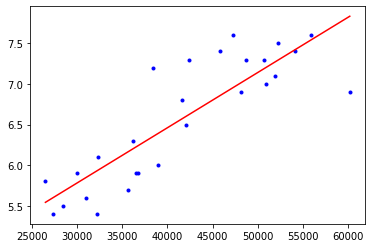

In [ ]:
y_h = model.predict(X)
plt.plot(X,y, 'b.')
plt.plot(X,y_h, 'r-')
plt.show()

In [ ]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)
X_new = [[37_655.2]]
print(model.predict(X_new))

[[6.33333333]]


In [ ]:
y_h = model.predict(X)


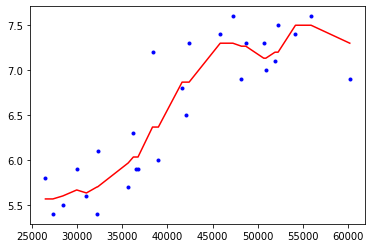

In [ ]:
plt.plot(X,y, 'b.')
plt.plot(X,y_h, 'r-')
plt.show()

# Task 1-1.3
_Prepare dataset_
 - Fetch Better Life Index (BLI) data from [OECD's website](http://stats.oecd.org/index.aspx?DataSetCode=BLI) (to get the Life Satisfaction for each country), and World Bank GDP per capita data from [OurWorldInData.org](https://ourworldindata.org/grapher/gdp-per-capita-worldbank)
 - Preview fetched data
 - Filter one 1 selected year
 - Merge the life satisfaction data and the GDP per capita data, keeping only the GDP per capita and Life satisfaction columns
 - Visuilza data on scatter plot
 - Add linear regresion line to the plot

_Type your code below_

In [ ]:
url_oecd = 'https://github.com/marcinsawinski/UEP_KIE_ML_LAB_PROG/raw/main/datasets/lifesat/gdp-per-capita-worldbank.csv'
oecd = pd.read_csv(url_oecd)
oecd.head()


,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810059
2,Afghanistan,AFG,2004,1200.277954
3,Afghanistan,AFG,2005,1286.793701
4,Afghanistan,AFG,2006,1315.789062


In [ ]:
gdp = oecd[oecd.Year==2020][['Entity','GDP per capita, PPP (constant 2017 international $)']]
gdp.columns = ['Country', 'GDP']
gdp.head()

,Country,GDP
18,Afghanistan,1970.560181
49,Albania,13191.952148
80,Algeria,10735.382812
111,Angola,6110.274414
142,Antigua and Barbuda,17293.302734


In [ ]:
url_bli = 'https://github.com/marcinsawinski/UEP_KIE_ML_LAB_PROG/raw/main/datasets/lifesat/oecd_bli_20221109.csv'
bli = pd.read_csv(url_bli)
bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.4,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.8,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN


In [ ]:

lsa = bli[(bli.Indicator == 'Life satisfaction') & (bli.INEQUALITY == 'TOT')][['Country','Value']]
lsa.columns = ['Country', 'Life satisfation']
lsa.head()

,Country,Life satisfation
1722,Australia,7.1
1723,Austria,7.2
1724,Belgium,6.8
1725,Canada,7.0
1726,Czech Republic,6.9


In [ ]:
gdp_lsa = gdp.merge(lsa, how = 'left', on='Country')
gdp_lsa.head()

,Country,GDP,Life satisfation
0,Afghanistan,1970.560181,NaN
1,Albania,13191.952148,NaN
2,Algeria,10735.382812,NaN
3,Angola,6110.274414,NaN
4,Antigua and Barbuda,17293.302734,NaN


In [ ]:
gdp_lsa.count()

Country             205
GDP                 205
Life satisfation     37
dtype: int64

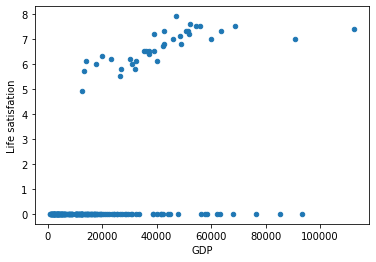

In [ ]:
gdp_lsa.fillna(0).plot(kind='scatter', x = 'GDP', y='Life satisfation')

In [ ]:
train = gdp_lsa[~gdp_lsa['Life satisfation'].isna()]
new = gdp_lsa[gdp_lsa['Life satisfation'].isna()]

In [ ]:
train.head()

,Country,GDP,Life satisfation
7,Australia,48678.683594,7.1
8,Austria,51857.691406,7.2
15,Belgium,48769.726562,6.8
23,Brazil,14063.982422,6.1
30,Canada,46064.253906,7.0


In [ ]:
new

,Country,GDP,Life satisfation
0,Afghanistan,1970.560181,NaN
1,Albania,13191.952148,NaN
2,Algeria,10735.382812,NaN
3,Angola,6110.274414,NaN
4,Antigua and Barbuda,17293.302734,NaN
...,...,...,...
200,Vanuatu,2854.292480,NaN
201,Vietnam,8200.332031,NaN
202,World,16185.165039,NaN
203,Zambia,3277.816406,NaN


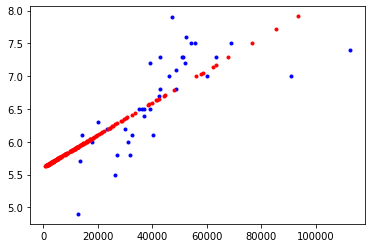

In [ ]:
model = LinearRegression()
model.fit(train[['GDP']], train['Life satisfation'])
y_h1 = model.predict(new[['GDP']])
plt.plot(train['GDP'],train['Life satisfation'], 'b.')
plt.plot(new['GDP'],y_h1, 'r.')
plt.show()

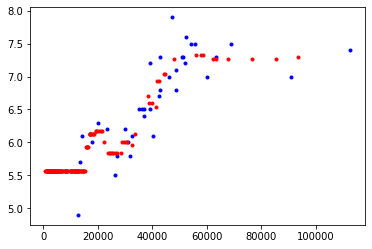

In [ ]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(train[['GDP']], train['Life satisfation'])
y_h2 = model.predict(new[['GDP']])

plt.plot(train['GDP'],train['Life satisfation'], 'b.')
plt.plot(new['GDP'],y_h2, 'r.')
plt.show()